In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from underthesea import word_tokenize, pos_tag, sent_tokenize
import warnings
from gensim import corpora, models, similarities
import re

In [2]:
STOP_WORD_FILE = 'data/files/vietnamese-stopwords.txt'

In [3]:
with open(STOP_WORD_FILE, 'r', encoding='utf-8') as file:
    stop_words = file.read()

stop_words = stop_words.split('\n')

# Underthesea
#### word_tokenize, pos_tag, sent_tokenize
- link: https://github.com/undertheseanlp/underthesea

In [4]:
# Dữ liệu thử nghiệm
df = pd.read_csv('data/csv/San_pham.csv', usecols=['ma_san_pham', 'mo_ta', 'ten_san_pham'])

In [5]:
df.head()

,ma_san_pham,ten_san_pham,mo_ta
0,318900012,Nước Hoa Hồng Klairs Không Mùi Cho Da Nhạy Cảm...,Nước Hoa Hồng Klairs Supple Preparation là dòn...
1,205100137,"Nước Tẩy Trang L'Oreal Tươi Mát Cho Da Dầu, Hỗ...",Nước Tẩy Trang L'Oréal là dòng sản phẩm tẩy tr...
2,422208973,Sữa Rửa Mặt CeraVe Sạch Sâu Cho Da Thường Đến ...,Sữa Rửa Mặt Cerave Sạch Sâu là sản phẩm sữa rử...
3,204900013,Kem Chống Nắng La Roche-Posay Kiểm Soát Dầu SP...,Kem chống nắng giúp bảo vệ da khỏi tia UVB & U...
4,253900006,Kem Chống Nắng Skin1004 Cho Da Nhạy Cảm SPF 50...,Kem Chống Nắng Skin1004 Cho Da Nhạy Cảm là sản...


In [6]:
# Tạo nội dung tổng hợp
# Lựa chọn các thông tin cần thiết để đưa vào phần content (giúp đề xuất nội dung)
# Có thể 1 cột hoặc nhiều cột thông tin
# ví dụ ở đây là chọn 1 cột, và chỉ lấy 200 từ đầu tiên trong phần mô tả (dễ quan sát khi làm demo)
df['Content'] = df['mo_ta'].apply(lambda x: ' '.join(x.split()[:200]))

In [7]:
df.head()

,ma_san_pham,ten_san_pham,mo_ta,Content
0,318900012,Nước Hoa Hồng Klairs Không Mùi Cho Da Nhạy Cảm...,Nước Hoa Hồng Klairs Supple Preparation là dòn...,Nước Hoa Hồng Klairs Supple Preparation là dòn...
1,205100137,"Nước Tẩy Trang L'Oreal Tươi Mát Cho Da Dầu, Hỗ...",Nước Tẩy Trang L'Oréal là dòng sản phẩm tẩy tr...,Nước Tẩy Trang L'Oréal là dòng sản phẩm tẩy tr...
2,422208973,Sữa Rửa Mặt CeraVe Sạch Sâu Cho Da Thường Đến ...,Sữa Rửa Mặt Cerave Sạch Sâu là sản phẩm sữa rử...,Sữa Rửa Mặt Cerave Sạch Sâu là sản phẩm sữa rử...
3,204900013,Kem Chống Nắng La Roche-Posay Kiểm Soát Dầu SP...,Kem chống nắng giúp bảo vệ da khỏi tia UVB & U...,Kem chống nắng giúp bảo vệ da khỏi tia UVB & U...
4,253900006,Kem Chống Nắng Skin1004 Cho Da Nhạy Cảm SPF 50...,Kem Chống Nắng Skin1004 Cho Da Nhạy Cảm là sản...,Kem Chống Nắng Skin1004 Cho Da Nhạy Cảm là sản...


In [8]:
# word_tokenize
df["Content_wt"]=df["Content"].apply(lambda x: word_tokenize(x, format="text"))

In [9]:
df[["Content", "Content_wt"]].head(2)

,Content,Content_wt
0,Nước Hoa Hồng Klairs Supple Preparation là dòn...,Nước Hoa_Hồng Klairs_Supple Preparation là dòn...
1,Nước Tẩy Trang L'Oréal là dòng sản phẩm tẩy tr...,Nước Tẩy_Trang L'Oréal là dòng sản_phẩm tẩy_tr...


# Cosine_similarity
- link https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html
- link https://en.wikipedia.org/wiki/Cosine_similarity
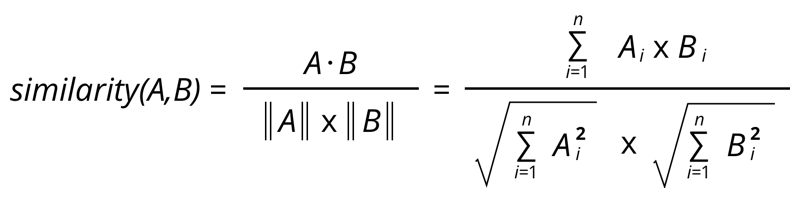

In [10]:
from numpy import dot
from numpy.linalg import norm
A = [1,2]
B = [2,2]
cos_sim = dot(A,B) / (norm(A)*norm(B))
print(cos_sim)

0.9486832980505138


In [11]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Vector hóa nội dung
vectorizer = TfidfVectorizer(analyzer='word', stop_words=stop_words)
tfidf_matrix = vectorizer.fit_transform(df['Content_wt'])

# Tính toán độ tương đồng
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['cập', 'dung', 'nhật', 'nội', 'phẩm', 'sản'] not in stop_words.
  warnings.warn(


In [12]:
df_show = pd.DataFrame(cosine_sim)
df_show

,0,1,2,3,4,5,6,7,8,9,...,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199
0,1.000000,0.042457,0.039199,0.027866,0.064716,0.051568,0.012819,0.051568,0.011758,0.042457,...,0.026034,0.052084,0.023364,0.042457,0.024821,0.007676,0.014858,0.004210,0.059755,0.039314
1,0.042457,1.000000,0.050687,0.194642,0.312959,0.261545,0.341452,0.261545,0.036672,1.000000,...,0.340047,0.128033,0.046581,1.000000,0.100192,0.159757,0.212134,0.027353,0.180263,0.340576
2,0.039199,0.050687,1.000000,0.053328,0.030697,0.041611,0.025348,0.041611,0.026774,0.050687,...,0.031900,0.033444,0.027230,0.050687,0.014918,0.015197,0.051129,0.006496,0.053942,0.036535
3,0.027866,0.194642,0.053328,1.000000,0.373916,0.090120,0.279422,0.090120,0.223231,0.194642,...,0.213416,0.344561,0.023868,0.194642,0.292470,0.194777,0.080596,0.017756,0.159526,0.190826
4,0.064716,0.312959,0.030697,0.373916,1.000000,0.158646,0.387592,0.158646,0.209171,0.312959,...,0.276723,0.315273,0.030425,0.312959,0.344740,0.243849,0.103510,0.018604,0.204957,0.276493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0.007676,0.159757,0.015197,0.194777,0.243849,0.059366,0.254809,0.059366,0.251776,0.159757,...,0.138168,0.175105,0.008136,0.159757,0.197840,1.000000,0.053892,0.011643,0.097246,0.140975
1196,0.014858,0.212134,0.051129,0.080596,0.103510,0.152452,0.110611,0.152452,0.017161,0.212134,...,0.112435,0.045975,0.076721,0.212134,0.046466,0.053892,1.000000,0.045235,0.063094,0.113890
1197,0.004210,0.027353,0.006496,0.017756,0.018604,0.015174,0.021125,0.015174,0.003895,0.027353,...,0.020614,0.021541,0.006667,0.027353,0.006188,0.011643,0.045235,1.000000,0.011029,0.019408
1198,0.059755,0.180263,0.053942,0.159526,0.204957,0.076377,0.172499,0.076377,0.087746,0.180263,...,0.192432,0.103569,0.031040,0.180263,0.096349,0.097246,0.063094,0.011029,1.000000,0.155831


In [13]:
# Save cosine_sim to file
import pickle
with open('products_cosine_sim.pkl', 'wb') as f:
    pickle.dump(cosine_sim, f)

# Open and read file to cosine_sim_new
with open('products_cosine_sim.pkl', 'rb') as f:
    cosine_sim_new = pickle.load(f)
# cosine_sim_new

In [14]:
# Hàm đề xuất sản phẩm
# Với mỗi sản phẩm, lấy nums sản phẩm tương quan nhất
def get_recommendations(sp_id, cosine_sim=cosine_sim, nums=3):
	idx = df.index[df['ma_san_pham'] == sp_id][0]
	# print(idx)
	print(f"Đây là 3 sản phẩm được recommend cho {sp_id}: ")
	sim_scores = list(enumerate(cosine_sim[idx]))
	sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
	sim_scores = sim_scores[1:nums+1]  # Lấy 3 sản phẩm tương tự nhất
	sp_indices = [i[0] for i in sim_scores]
	return df.iloc[sp_indices]

In [15]:
recommendations = get_recommendations(318900012)
recommendations

Đây là 3 sản phẩm được recommend cho 318900012: 


,ma_san_pham,ten_san_pham,mo_ta,Content,Content_wt
97,318900011,Nước Hoa Hồng Klairs Dành Cho Da Nhạy Cảm 180ml,Nước Hoa Hồng Klairs Supple Preparation là dòn...,Nước Hoa Hồng Klairs Supple Preparation là dòn...,Nước Hoa_Hồng Klairs_Supple Preparation là dòn...
600,422203798,Nước Hoa Hồng Klairs Không Mùi Cho Da Nhạy Cảm...,Nước Hoa Hồng Klairs Supple Preparation Unscen...,Nước Hoa Hồng Klairs Supple Preparation Unscen...,Nước Hoa_Hồng Klairs_Supple Preparation_Unscen...
67,211300002,Nước Hoa Hồng Simple Làm Dịu Da & Cấp Ẩm 200ml,Nước Hoa Hồng Simple Kind to Skin Soothing Fac...,Nước Hoa Hồng Simple Kind to Skin Soothing Fac...,Nước Hoa_Hồng Simple Kind to Skin_Soothing Fac...
